## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


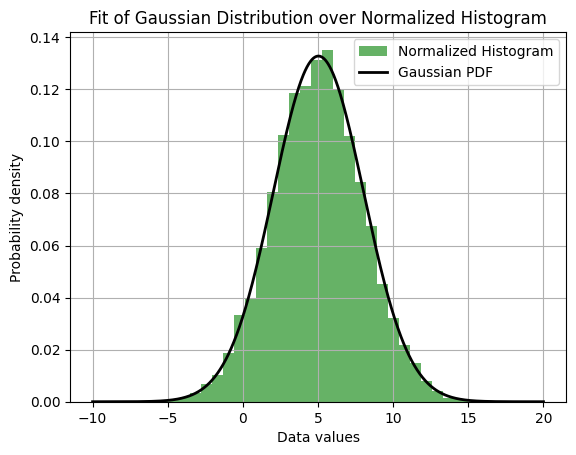

+--------------------------------------+
| Mean: 5.027152443622421              |
| Variance: 9.028667318774586          |
+--------------------------------------+


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Load the data
data = np.load('clean_data.npy')

# Step 2: Calculate the mean and variance using MLE
mean = np.mean(data)
variance = np.var(data)

# Step 3: Define the Gaussian distribution (PDF) with the estimated mean and variance
x = np.linspace(-10, 20, 1000)  # Range of x values for plotting the PDF
pdf = norm.pdf(x, mean, np.sqrt(variance))  # Probability Density Function for Gaussian

# Step 4: Create a normalized histogram of the data
data = data.flatten()  # This will convert data to a 1D array, if it's not already
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Normalized Histogram')

# Step 5: Plot the Gaussian PDF on top of the histogram
plt.plot(x, pdf, 'k', linewidth=2, label='Gaussian PDF')

# Adding a grid
plt.grid(True)

# Title and labels
plt.title('Fit of Gaussian Distribution over Normalized Histogram')
plt.xlabel('Data values')
plt.ylabel('Probability density')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

# ASCII Art Output
border_line = "+" + "-" * 38 + "+"
print(border_line)
print("| Mean: {:<30} |".format(mean))
print("| Variance: {:<26} |".format(variance))
print(border_line)


1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

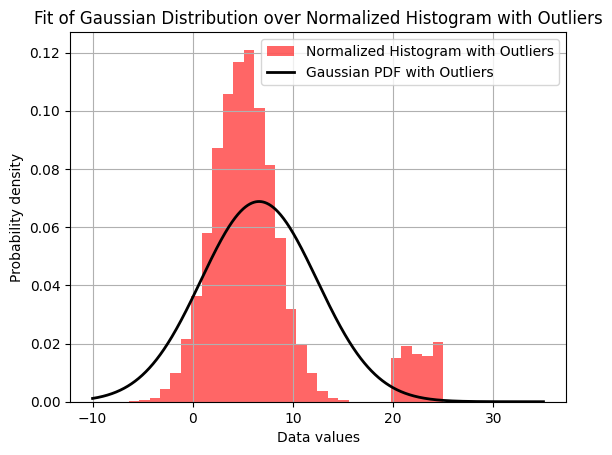

+---------------------------------------------+
| Mean with outliers: 6.614508398212064       |
| Variance with outliers: 33.61185712302579   |
+---------------------------------------------+

Mean: 
- Outliers can pull the mean toward them, as the mean is sensitive to all data points. 
- If the outliers are significantly higher or lower than the rest of the data, the mean will be skewed in that direction.

The mean has increased from 5.03 to 6.61, indicating that the outliers have likely skewed the data towards the right. This is a typical effect of outliers; if they are predominantly higher than the bulk of the data, they will drag the mean upwards.

Variance: 
- Outliers increase the variance because they increase the average squared distance from the mean. 
- The presence of outliers will typically result in a much larger variance, indicating a wider spread of data.

The variance has a more pronounced increase from 9.03 to 33.62. Variance measures the spread of the data, and the pr

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Load the corrupted data
corrupted_data = np.load('corrupted_data.npy')

# Step 2: Calculate the mean and variance using MLE for the corrupted data
corrupted_mean = np.mean(corrupted_data)
corrupted_variance = np.var(corrupted_data)

# Step 3: Define the Gaussian distribution (PDF) with the estimated mean and variance for the corrupted data
x_corrupted = np.linspace(-10, 35, 1000)  # Adjusted range of x values for plotting the PDF
corrupted_pdf = norm.pdf(x_corrupted, corrupted_mean, np.sqrt(corrupted_variance))  # PDF for Gaussian

# Step 4: Create a normalized histogram of the corrupted data
corrupted_data = corrupted_data.flatten()  # Convert data to 1D array if not already
plt.hist(corrupted_data, bins=30, density=True, alpha=0.6, color='r', label='Normalized Histogram with Outliers')

# Step 5: Plot the Gaussian PDF on top of the histogram for the corrupted data
plt.plot(x_corrupted, corrupted_pdf, 'k', linewidth=2, label='Gaussian PDF with Outliers')

# Adding a grid
plt.grid(True)

# Title and labels
plt.title('Fit of Gaussian Distribution over Normalized Histogram with Outliers')
plt.xlabel('Data values')
plt.ylabel('Probability density')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

# ASCII Art Output for Mean and Variance
border_line = "+" + "-" * 45 + "+"
print(border_line)
print("| Mean with outliers: {:<23} |".format(corrupted_mean))
print("| Variance with outliers: {:<19} |".format(corrupted_variance))
print(border_line)

# Explanatory text (without ASCII art borders)
print("\nMean: \n- Outliers can pull the mean toward them, as the mean is sensitive to all data points. \n- If the outliers are significantly higher or lower than the rest of the data, the mean will be skewed in that direction.\n")
print("The mean has increased from 5.03 to 6.61, indicating that the outliers have likely skewed the data towards the right. This is a typical effect of outliers; if they are predominantly higher than the bulk of the data, they will drag the mean upwards.\n")
print("Variance: \n- Outliers increase the variance because they increase the average squared distance from the mean. \n- The presence of outliers will typically result in a much larger variance, indicating a wider spread of data.\n")
print("The variance has a more pronounced increase from 9.03 to 33.62. Variance measures the spread of the data, and the presence of outliers can dramatically increase this spread because they contribute heavily to the sum of the squared differences from the mean.\n")
print("The mismatch between the Gaussian PDF and the normalized histogram in this graph suggests that the underlying data is not normally distributed due to the outliers.\n")
print("These occurred because MLE does not distinguish between typical data points and outliers; it treats all data points as equally representative of the underlying distribution. If the data is corrupted by outliers, the estimated Gaussian distribution using MLE will be affected, reflecting these atypical data points in the estimated mean and variance.")


1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

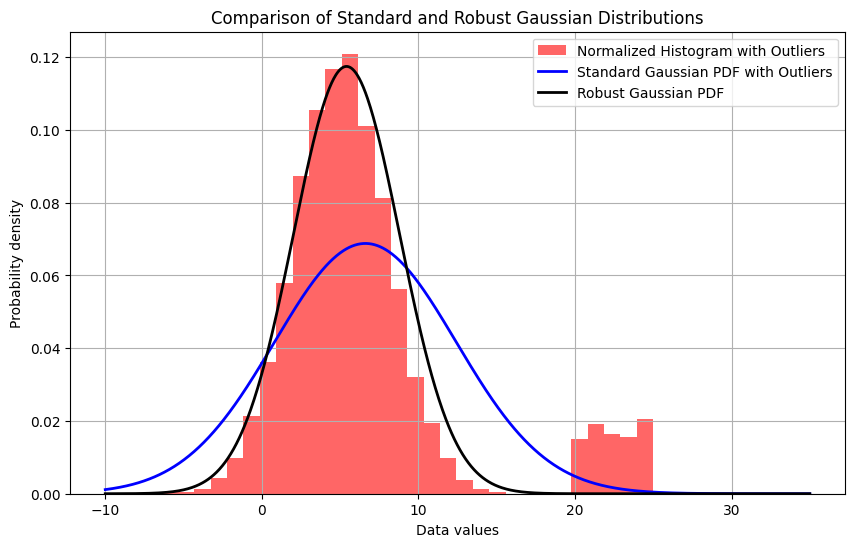


+------------------------------------+-------------------+-------------------+
| Description                        | Mean              | Variance          |
+------------------------------------+-------------------+-------------------+
| Clean Data (Exercise 1.1)          | 5.027152443622421 | 9.028667318774586 |
| Corrupted Data (Standard, Ex 1.2)  | 6.614508398212064 | 33.61185712302579 |
| Corrupted Data (Robust, Ex 1.3)    | 5.410667961396163 | 11.53044687699028 |
+------------------------------------+-------------------+-------------------+

Clean Data (Exercise 1.1): The estimated mean (5.03) and variance (9.03) are representative of the data, assuming no significant outliers are present. These values are assumed to reflect the true parameters of the underlying Gaussian distribution from which the data was sampled.

Corrupted Data (Standard, Ex 1.2): When the data is corrupted with outliers, the standard estimators (mean and variance) are significantly affected. The mean increa

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the corrupted data
corrupted_data_path = 'corrupted_data.npy'  # Replace with your file path
corrupted_data = np.load(corrupted_data_path)

# Standard Gaussian fit using mean and variance for corrupted data (Exercise 1.2)
corrupted_mean = np.mean(corrupted_data)
corrupted_variance = np.var(corrupted_data)
x_corrupted = np.linspace(-10, 35, 1000)  # Adjusted range for plotting the PDF
standard_gaussian_pdf = norm.pdf(x_corrupted, corrupted_mean, np.sqrt(corrupted_variance))

# Robust Gaussian fit using median and MAD (Exercise 1.3)
corrupted_median = np.median(corrupted_data)
mad = np.median(np.abs(corrupted_data - corrupted_median))
robust_std = mad * 1.4826  # Scaling factor for Gaussian distribution
# The constant 1.4826 used in the calculation robust_std = mad * 1.4826 is not arbitrary. 
# It is a scaling factor that relates the MAD to the standard deviation for a normally distributed dataset.
# https://aakinshin.net/posts/unbiased-mad/

robust_gaussian_pdf = norm.pdf(x_corrupted, corrupted_median, robust_std)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(corrupted_data, bins=30, density=True, alpha=0.6, color='r', label='Normalized Histogram with Outliers')
plt.plot(x_corrupted, standard_gaussian_pdf, 'b', linewidth=2, label='Standard Gaussian PDF with Outliers')
plt.plot(x_corrupted, robust_gaussian_pdf, 'k', linewidth=2, label='Robust Gaussian PDF')

# Adding a grid, title, labels, and legend
plt.grid(True)
plt.title('Comparison of Standard and Robust Gaussian Distributions')
plt.xlabel('Data values')
plt.ylabel('Probability density')
plt.legend()

# Show the plot
plt.show()

# Mean and variance from Exercise 1.1 (clean data)
clean_mean = 5.027152443622421
clean_variance = 9.028667318774586

# Creating a table for comparison
table = f'''
+------------------------------------+-------------------+-------------------+
| Description                        | Mean              | Variance          |
+------------------------------------+-------------------+-------------------+
| Clean Data (Exercise 1.1)          | {clean_mean:<17} | {clean_variance:<16} |
| Corrupted Data (Standard, Ex 1.2)  | {corrupted_mean:<17} | {corrupted_variance:<16} |
| Corrupted Data (Robust, Ex 1.3)    | {corrupted_median:<17} | {robust_std**2:<16} |
+------------------------------------+-------------------+-------------------+
'''

print(table)

print("Clean Data (Exercise 1.1): The estimated mean (5.03) and variance (9.03) are representative of the data, assuming no significant outliers are present. These values are assumed to reflect the true parameters of the underlying Gaussian distribution from which the data was sampled.\n")

print("Corrupted Data (Standard, Ex 1.2): When the data is corrupted with outliers, the standard estimators (mean and variance) are significantly affected. The mean increases to 6.61, and the variance balloons to 33.61. These changes are due to the outliers pulling the mean away from the central bulk of the data and inflating the variance, which squares the deviations, hence magnifying the impact of outliers.\n")

print("Corrupted Data (Robust, Ex 1.3): By using the median (5.41) as a robust estimator of the central tendency and the squared robust standard deviation (11.53) derived from MAD as a measure of spread, the fitted distribution remains more stable and less influenced by the outliers. The median value is closer to the mean of the clean data, suggesting it is more representative of the central location of the bulk of the data. Similarly, the robust variance is larger than that of the clean data but not excessively inflated like the standard variance; it captures the inherent variability in the data without the disproportionate influence of outliers.\n")

print("To achieve robustness in fitting a distribution to the corrupted data, the approach involves using statistics that are less influenced by outliers. Specifically, this is done by using the median and the Median Absolute Deviation (MAD) instead of the mean and standard deviation. Here's how this approach provides robustness:\n")

print("1.) Median as a Robust Measure of Central Tendency:\n")

print("- The median is the middle value of a dataset when it is sorted in ascending order. It is inherently robust because it is not affected by the magnitude of extreme values (values that are not too small or not too big), unlike the mean.\n")

print("- In the presence of outliers, the mean can be significantly skewed, leading to a poor representation of the dataset's central tendency. The median, however, remains relatively stable even with the presence of extreme values.\n")

print("2.) MAD as a Robust Measure of Spread:\n")

print("- The MAD is calculated as the median of the absolute deviations from the dataset's median. It measures the variability in the data in a way that is not influenced heavily by outliers.\n")

print("- Traditional variance or standard deviation can be greatly inflated by outliers, as they square the deviations, amplifying the effect of extreme values. MAD, on the other hand, is based on median values, which makes it less sensitive to outliers.\n")

print("3.) Robust Gaussian Distribution:\n")

print("- In this approach, a Gaussian distribution is fitted to the data using the median and MAD-derived standard deviation. This results in a \"Robust Gaussian\" distribution that is less skewed by outliers than a standard Gaussian distribution fitted with mean and variance.\n")

print("By using the median and MAD, the robust fitting approach focuses on the more \"typical\" values in the data, providing a more accurate representation of the underlying distribution, especially when the data is contaminated with outliers.\n")

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size $(N\times3)$ that has been reshaped into a vector of size $(N*3 \times 1)$. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the singular values associated with each of the eigenvectors.

**(5 marks)**

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the singular values estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [ ]:
import os
import pandas as pd

## Define paths to the training data and targets files
training_data_path = root_dir + 'Training_data.csv'
training_targets_path = root_dir + 'Training_data_targets.csv'

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**


*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).


*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)